## Amazon Reviews Data Analysis and Visualization
<br>
Data used is in CSV format.<br>Collected from kaggle.com, and can be viewed <a href=https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset>here</a>
. <br>Also, look for <b>amazon.csv</b> in files.

In [211]:
import pandas as pd
data = pd.read_csv('amazon.csv')
data[:5]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Data Cleaning and Usability

In [212]:
#check null values
data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [213]:
#remove nullities
data = data.dropna()
data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [214]:
#add column of discount price as integer
data['disc_perc_int'] = data['discount_percentage'].str.replace('%', '')
data['disc_perc_int'] = pd.to_numeric(data['disc_perc_int'], errors='coerce')
data['disc_perc_int'].head()

0    64
1    43
2    90
3    53
4    61
Name: disc_perc_int, dtype: int64

In [215]:
#check ratings for invalid data
a = [] #list NaNs
for i, row in data.iterrows():
    if data['rating'][i].replace(".", "").isnumeric():
        continue
    else:
        print(row[['product_id', 'product_name', 'rating']])
        print('\n\nA value with invalid rating: ' + row['rating'] + 
              ' at row ' + str(i))
        a.append(data['rating'][i])

product_id                                             B08L12N5H1
product_name    Eureka Forbes car Vac 100 Watts Powerful Sucti...
rating                                                          |
Name: 1279, dtype: object


A value with invalid rating: | at row 1279


In [216]:
#imputate all invalid occurences with 0
for i in range(len(a)): 
    data['rating'] = data['rating'].replace(a[i], '0')

<hr>

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
%matplotlib inline

#(Credit for the below code goes to @ANZ check out his notebook as well)
cmap = cm.get_cmap('autumn',12) #colormap and number
col_def =[]
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    col_def.append(rgb2hex(rgb))
    print(rgb2hex(rgb))

#ff0000
#ff1700
#ff2e00
#ff4600
#ff5d00
#ff7400
#ff8b00
#ffa200
#ffb900
#ffd100
#ffe800
#ffff00


<hr>

### Number of Products per *Generalized* Catagory

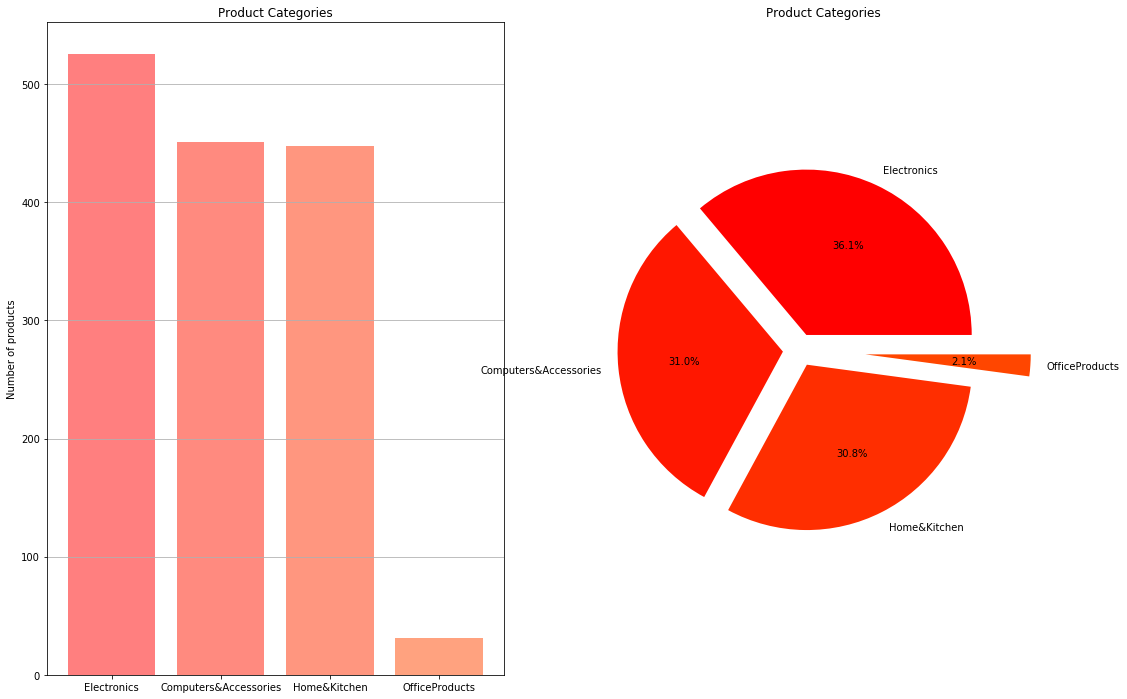

In [218]:
#get general categories labels and num of each occurences in order they appear
for i, row in data.iterrows():
    data.loc[i, 'category_trunc'] = (row['category'].split('|')[0])
labels = pd.Series(data['category_trunc']).value_counts().index.tolist()
sizes = data['category_trunc'].value_counts()

explode = (0.1, 0.1, 0.1, 0.4)
fig, ax = plt.subplots(1,2,figsize=(18,12))

#plot bargraph of all categories
x_pos = np.arange(len(labels[:4]))
ax[0].bar(x_pos, sizes[:4], align='center', color=col_def, alpha=0.5)
ax[0].set_title('Product Categories')
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('Number of products')
ax[0].yaxis.grid(True)

#plot pie chart of only top 4 catagories
ax[1].pie(sizes[:4], labels=labels[:4], colors=col_def, explode=explode, 
       autopct='%1.1f%%')
ax[1].axis('equal')
ax[1].set_title('Product Categories')

plt.show()

<hr>

### Let's Have a Closer Look at the Different types of Electronics
Get more specialized type of products in electronics catagory.

In [219]:
temp = np.array([]) #1. create temp to store array of relevant entries
for i, row in data.iterrows():
    data.loc[i, 'category_trunc2'] = (row['category'].split('|')[1])
    if data.loc[i, 'category_trunc'] == 'Electronics': #2. if in electronics...
        temp = np.append(temp, data.loc[i,'category_trunc2']) #... append>temp

#3. convert to pd Series and get labels and sizes (only first 6)
labels = pd.Series(temp).value_counts().index.tolist()[:6]
sizes = pd.Series(temp).value_counts()[:6]

print("Catagories in Electronics:\n")
[print(str(i+1) + '. ' + labels[i] + '\n') for i in range(len(labels))]
print('')

Catagories in Electronics:

1. HomeTheater,TV&Video

2. Mobiles&Accessories

3. WearableTechnology

4. Headphones,Earbuds&Accessories

5. HomeAudio

6. Cameras&Photography




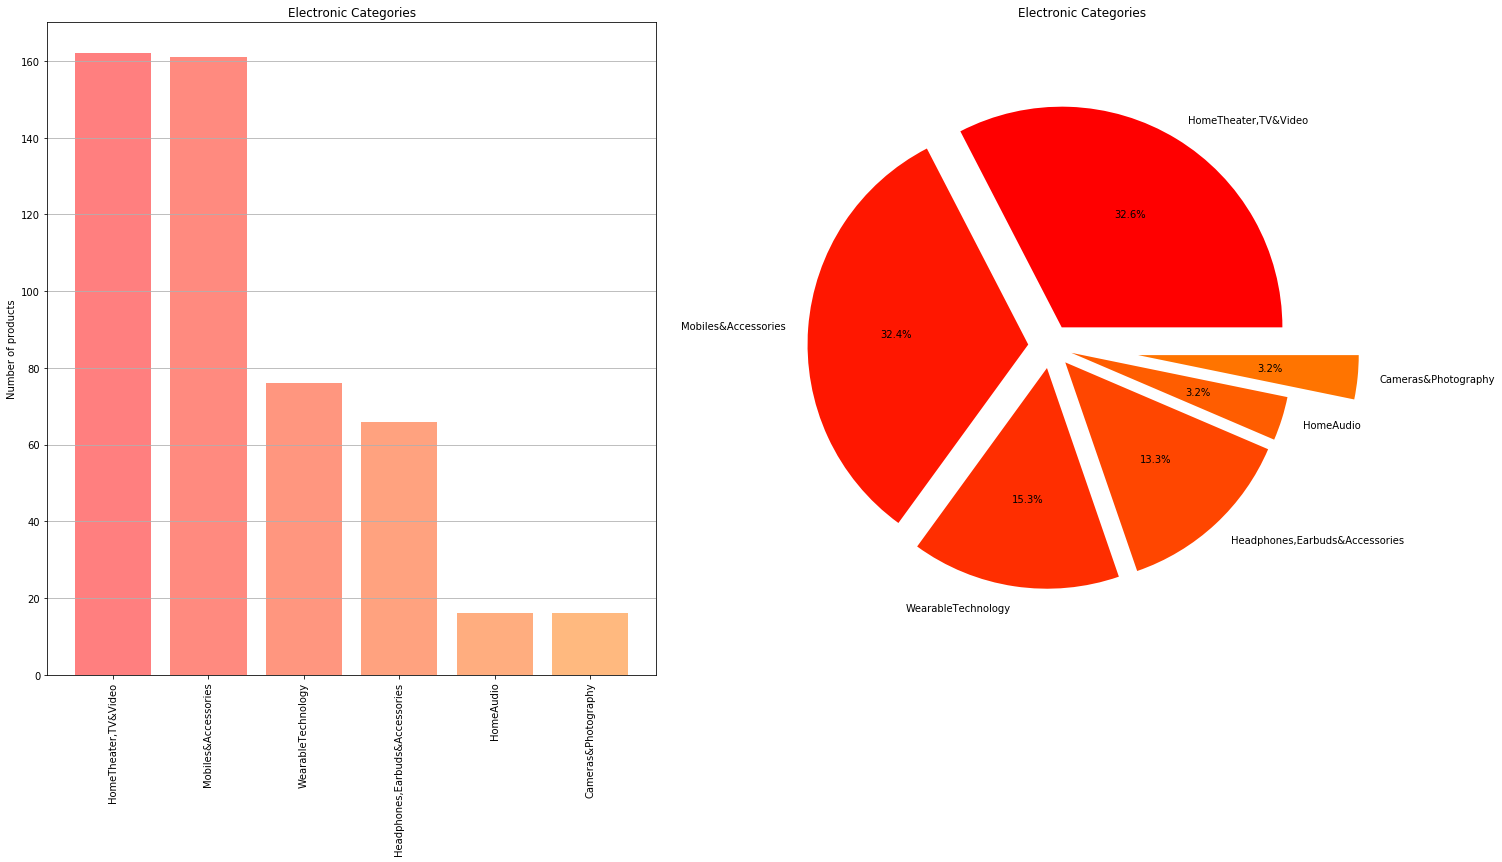

In [220]:
explode = [0.1] * (len(labels)-1)
explode.append(0.4)

fig, ax = plt.subplots(1,2,figsize=(24,12))

#plot bargraph of all categories
x_pos = np.arange(len(labels))
ax[0].bar(x_pos, sizes, align='center', color=col_def, alpha=0.5)
ax[0].set_title('Electronic Categories')
ax[0].set_xticks(x_pos)
ax[0].set_xticklabels(labels)
ax[0].set_xticklabels(labels, rotation=90)
ax[0].set_ylabel('Number of products')
ax[0].yaxis.grid(True)

#plot pie chart of only top 4 catagories
ax[1].pie(sizes, labels=labels, colors=col_def, explode=explode, 
       autopct='%1.1f%%')
ax[1].axis('equal')
ax[1].set_title('Electronic Categories')

plt.show()

<hr>

### Highest & Average Discount by Category and Standard Deviation
For each general category, find the highest, and mean discount percentage.

In [221]:
#a look at the discount percentages
data[['category_trunc', 'discount_percentage']].head()

,category_trunc,discount_percentage
0,Computers&Accessories,64%
1,Computers&Accessories,43%
2,Computers&Accessories,90%
3,Computers&Accessories,53%
4,Computers&Accessories,61%


In [222]:
#Highest discounted item
print(data.loc[data['disc_perc_int'].idxmax(),
               ['product_name', 'category_trunc', 'discount_percentage', 
                'discounted_price', 'actual_price', 'rating', 'rating_count']])

product_name           rts [2 Pack] Mini USB C Type C Adapter Plug, T...
category_trunc                                     Computers&Accessories
discount_percentage                                                  94%
discounted_price                                                    ₹294
actual_price                                                      ₹4,999
rating                                                               4.3
rating_count                                                       4,426
Name: 695, dtype: object


In [223]:
from numpy import std

a = pd.DataFrame() #1. Create empty data frame to hold category and mean...
cat_trunc = pd.Series(data['category_trunc']).value_counts().index #... disc %

for j in range(len(cat_trunc)):
    t1 = 0
    t2 = 0
    t3 =[]
    #2. count number of products in category
    for i, row in data.iterrows():
        if data['category_trunc'][i] ==cat_trunc[j]:
            t1+=1
    #3. tally sum of discount percentages
    for i, row in data.iterrows():
        if data['category_trunc'][i] == cat_trunc[j]:
            t2 += data['disc_perc_int'][i]
            t3.append(data['disc_perc_int'][i])
    
    #4. store in new dataframe -> Category | Mean Discount
    a.loc[j, 'Category'] = cat_trunc[j]
    a.loc[j, 'Mean Discount'] = t2 / t1
    a.loc[j, 'Standard Deviation'] = std(t3)

a

,Category,Mean Discount,Standard Deviation
0,Electronics,50.828897,22.007716
1,Computers&Accessories,53.920177,19.793341
2,Home&Kitchen,40.120536,18.427918
3,OfficeProducts,12.354839,17.914759
4,HomeImprovement,57.500000,0.500000
5,MusicalInstruments,46.000000,14.000000
6,Car&Motorbike,42.000000,0.000000
7,Toys&Games,0.000000,0.000000
8,Health&PersonalCare,53.000000,0.000000


<hr>

### Correlation of Discount to Rating
Check for correlation between Discount Percentage and Review Score.

In [224]:
#see how many 0s, 1s, 2s, 3s, 4s, 5s in ratings
data['rating'] = data['rating'].astype(float) #convert ratings to float
a = [0] * 6 # [# of 0s, # of 1s, ... , #of 5s]

for i in data['rating']:
    if 0 <= i < 1:
        a[0]+=1
    elif 1 <= i < 2:
        a[1]+=1
    elif 2 <= i < 3:
        a[2]+=1
    elif 3 <= i < 4:
        a[3]+=1
    elif 4 <= i < 5:
        a[4]+=1
    else:
        a[5]+=1

print('\n' + pd.DataFrame([a], columns=['0s', '1s', '2s', '3s', '4s', '5s']).to_string(index=False))


 0s  1s  2s   3s    4s  5s
  1   0   6  347  1107   2


As we can see, most reviews are either 3 or 4 stars. The **y-axis** will take this into account.

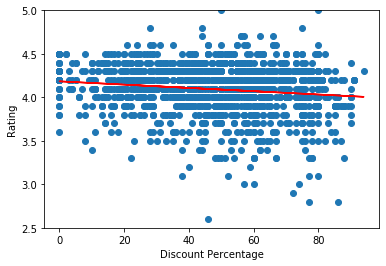

In [225]:
#x and y values
x = data['disc_perc_int']
y = data['rating']

fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(x, y)

ax.set_xlabel("Discount Percentage")
ax.set_ylabel("Rating")

#set limit of y axis
plt.ylim(2.5, 5)

#line of best fit
m, c = np.polyfit(x, y, 1)
y_fit = m * x + c
plt.plot(x, y_fit, 'r')

plt.show()

As can be see, there is little to no correlation between discount and rating.

<hr>

### NLP: Sentiment analysis of User Reviews

Use nltk to parse and pre process word content data.

In [226]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#change empty strings to na and drop
data['review_content'].replace(' ', np.nan, inplace=True)
data.dropna(subset=['review_content'], inplace=True)

#word count
print('\n\nA comparison of review title and the word count of the review content.')
data['content_word_count'] = data['review_content'].apply(lambda x: len(str(x).split(' ')))                                                    

data[['review_title', 'content_word_count']].head()



A comparison of review title and the word count of the review content.


,review_title,content_word_count
0,"Satisfied,Charging is really fast,Value for mo...",60
1,"A Good Braided Cable for Your Type C Device,Go...",201
2,"Good speed for earlier versions,Good Product,W...",13
3,"Good product,Good one,Nice,Really nice product...",77
4,"As good as original,Decent,Good one for second...",415


In [227]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

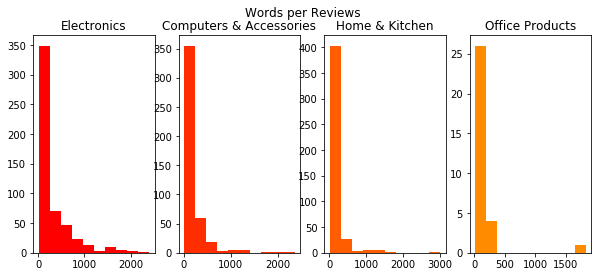

In [228]:
fig, ax = plt.subplots(1,4,figsize=(10,4))

words = data[data['category_trunc'] == 'Electronics']['content_word_count']
ax[0].hist(words, color=col_def[0])
ax[0].set_title('Electronics')
words = data[data['category_trunc'] == 'Computers&Accessories']['content_word_count']
ax[1].hist(words, color=col_def[2])
ax[1].set_title('Computers & Accessories')
words = data[data['category_trunc'] == 'Home&Kitchen']['content_word_count']
ax[2].hist(words, color=col_def[4])
ax[2].set_title('Home & Kitchen')
words = data[data['category_trunc'] == 'OfficeProducts']['content_word_count']
ax[3].hist(words, color=col_def[6])
ax[3].set_title('Office Products')

fig.suptitle('Words per Reviews')

plt.show()

We can see that most reviews are less than 1000 words. ***Word count spread is similiar across product catagories.***

#### Preprocess the Conent
1. Remove puncuation, special letters, URLs
2. Removing leading, trailing & extra whitespaces
3. Correct typos, slang, abbreviations
4. Remove stop words
5. Stemming (i.e. remove prefix/suffic
6. Lemmitization (i.e reduce word to base form)

In [229]:
def preprocess(text):
    text = text.lower()
    text=text.strip()
    text=re.compile('<.*?!>@#%^&()"').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

def stopword(string):
    a = [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

stemmer = SnowballStemmer('english')

def stemming(string):
    a = [stemmer.stem(i) for i in string.split()]
    return ' '.join(a)



wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)

    
def finalpreprocess(string):
    return lemmatizer(stemming(stopword(preprocess(string))))

data['clean_content'] = data['review_content'].apply(lambda x: finalpreprocess(x))
data[['review_content', 'clean_content']].head()

,review_content,clean_content
0,Looks durable Charging is fine tooNo complains...,look durabl charg fine toono complain charg re...
1,I ordered this cable to connect my phone to An...,order cabl connect phone android auto car cabl...
2,"Not quite durable and sturdy,https://m.media-a...",quit durabl sturdi https medium amazon com ima...
3,"Good product,long wire,Charges good,Nice,I bou...",good product long wire charg good nice buy cab...
4,"Bought this instead of original apple, does th...",buy instead origin appl work r fast appl charg...


#### Now we will start to prepare the model.

In [230]:

from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Normalization, Conv1D, MaxPooling1D, Flatten, Reshape
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [231]:
tokenizer = Tokenizer(split=' ')
a = tokenizer.fit_on_texts(data['clean_content'].values)
X = tokenizer.texts_to_sequences(data['clean_content'].values)
X = tokenizer.sequences_to_matrix(X, mode='tfidf')
X = pad_sequences(X)

print('Cleaned data tokenized and converted into prproccessing sequences.')
print(X)

Cleaned data tokenized and converted into prproccessing sequences.
[[0 1 1 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 6 6 6]]


In [232]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, data['rating'], test_size=0.25, random_state=5)

In [234]:
#Engineer Model
hparams = {
    "batch_size": 128,
    "cnn_filter_sizes": [128, 128, 128],
    "cnn_kernel_sizes": [5, 5, 5],
    "cnn_pooling_sizes": [5, 5, 40],
    "constraint_learning_rate": 0.01,
    "embedding_dim": 100,
    "embedding_trainable": False,
    "learning_rate": 0.005,
    "max_num_words": 10000,
    "max_sequence_length": 250
}

model = Sequential([
    Normalization(input_shape=[X.shape[1],], axis=None),
    Reshape((43, 214), input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Conv1D(128, 5, activation='relu', padding='same'),
    MaxPooling1D(5, padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer="adam")
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_34 (Normaliza  (None, 9202)             3         
 tion)                                                           
                                                                 
 reshape_9 (Reshape)         (None, 43, 214)           0         
                                                                 
 dense_91 (Dense)            (None, 43, 128)           27520     
                                                                 
 conv1d_18 (Conv1D)          (None, 43, 128)           82048     
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 9, 128)           0         
 g1D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 1152)            

In [235]:
#Model Training
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 13ms/step - loss: 1.5787
Epoch 2/100
35/35 [==============================] - 0s 13ms/step - loss: 0.5562
Epoch 3/100
35/35 [==============================] - 0s 12ms/step - loss: 0.3326
Epoch 4/100
35/35 [==============================] - 0s 12ms/step - loss: 0.2294
Epoch 5/100
35/35 [==============================] - 0s 12ms/step - loss: 0.2433
Epoch 6/100
35/35 [==============================] - 0s 11ms/step - loss: 0.1771
Epoch 7/100
35/35 [==============================] - 0s 12ms/step - loss: 0.1578
Epoch 8/100
35/35 [==============================] - 0s 13ms/step - loss: 0.1468
Epoch 9/100
35/35 [==============================] - 3s 94ms/step - loss: 0.1481
Epoch 10/100
35/35 [==============================] - 0s 11ms/step - loss: 0.1625
Epoch 11/100
35/35 [==============================] - 0s 12ms/step - loss: 0.1390
Epoch 12/100
35/35 [==============================] - 0s 12ms/step - loss: 0.1263
Epoch 13/100
35/35 [=====

In [236]:
#save model locally
import pickle
with open('model1.pk1', 'wb') as file:  
    pickle.dump(model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv1d
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling1d
......vars
...layers\normalization
......vars
.........0
.........1
.........2
...layers\reshape
......vars
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-10-15 05:02:44         3039
metadata.json                                  2023-10-15 05:02:44           64
variables.h5                 

<hr>

### Model Testing


In [237]:
score = model.evaluate(X_test, y_test, verbose = 0)

print(score)

0.22499005496501923


In [238]:
y_true = data['rating']
y_pred = model.predict(X)

mean_squared_error(y_true, y_pred)

46/46 [==============================] - 0s 6ms/step


0.030665360464767966

In [239]:
model.predict(X[5:10])

1/1 [==============================] - 0s 25ms/step


array([[4.1082983],
       [3.9368284],
       [3.7987459],
       [4.0905375],
       [4.1384726]], dtype=float32)